### Semana 3: Geodésicas tipo tiempo

#### Análisis de signo de la segunda derivada del potencial:

In [24]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [25]:
#Símbolos:
r,m,h = sp.symbols('r,m,h', positive = True)

La segunda derivada del potencial es
$$
\tilde{V}''(r) = 2m \left[ -\frac{2}{r^3} + \frac{3h^2m}{r^4} - \frac{12h^2m^2}{r^5} \right]
$$
con extremos locales en 
$$
r_A = \frac{mh^2}{2} \left(1 - \sqrt{1 - \frac{12}{h^2}} \right), \quad r_B =\frac{mh^2}{2} \left(1 + \sqrt{1 - \frac{12}{h^2}} \right).
$$

In [26]:
#Segunda derivada del potencial:
d2Vdx2 = 2*m*(-2/r**3 + 3*h**2*m/r**4 - 12*h**2*m**2/r**5)
display(d2Vdx2)

2*m*(-12*h**2*m**2/r**5 + 3*h**2*m/r**4 - 2/r**3)

In [27]:
#Extremos:
rA = (m*h**2/2)*(1 - sp.sqrt(1 - 12/h**2))
rB = (m*h**2/2)*(1 + sp.sqrt(1 - 12/h**2))

In [28]:
#Evaluación de la segunda derivada en los extremos:
dV_rA = sp.simplify(d2Vdx2.subs(r,rA))
dV_rB = sp.simplify(d2Vdx2.subs(r,rB))

display(dV_rA)
display(dV_rB)

32*(3*h*(-h + sqrt(h**2 - 12)) + (-h + sqrt(h**2 - 12))**2 + 24)/(h**3*m**2*(-h + sqrt(h**2 - 12))**5)

32*(3*h*(h + sqrt(h**2 - 12)) - (h + sqrt(h**2 - 12))**2 - 24)/(h**3*m**2*(h + sqrt(h**2 - 12))**5)

Como $h > \sqrt{12}$, es claro que
$$
-h + \sqrt{h^2-12} \leq 0,
$$
$$
h + \sqrt{h^2-12} \geq 0.
$$

Por lo tanto, el signo de las segundas derivadas evaluadas está determinado por el numerador.

In [29]:
#Numeradores:
num_1 = 3*h*(-h + sp.sqrt(h**2 - 12)) + (-h + sp.sqrt(h**2 - 12))**2 + 24
num_2 = 3*h*(h + sp.sqrt(h**2 - 12)) - (h + sp.sqrt(h**2 - 12))**2 - 24

num_1_exp = sp.expand(num_1)
num_2_exp = sp.expand(num_2)

display(num_1_exp)
display(num_2_exp)

-h**2 + h*sqrt(h**2 - 12) + 12

h**2 + h*sqrt(h**2 - 12) - 12

El análisis final se encuentra en el documento pdf de la semana 3.

#### Gráfica del potencial efectivo:

El potencial efectivo está dado por
$$
\tilde{V}(r) = \left( 1 - \frac{2m}{r} \right) \left( 1 + \frac{h^2 m^2}{r^2}\right), \quad r > 2m.
$$

Si definimos la variable adimensional $\bar{r}:= r/m$, 
$$
\tilde{V}(\bar{r}) = \left( 1 - \frac{2}{\bar{r}} \right) \left( 1 + \frac{h^2}{\bar{r}^2}\right), \quad \bar{r} > 2. 
$$

In [30]:
def V(r,h):
    return (1 - 2/r)*(1 + h**2/r**2)

In [31]:
r = np.linspace(2,100,10**4) 
h = np.array([0.0,2.5,2*np.sqrt(3),4,5])

colors = ['red','orange','gold','green','blue','purple']

C:\Users\asaav\AppData\Local\Temp\ipykernel_19100\587750823.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


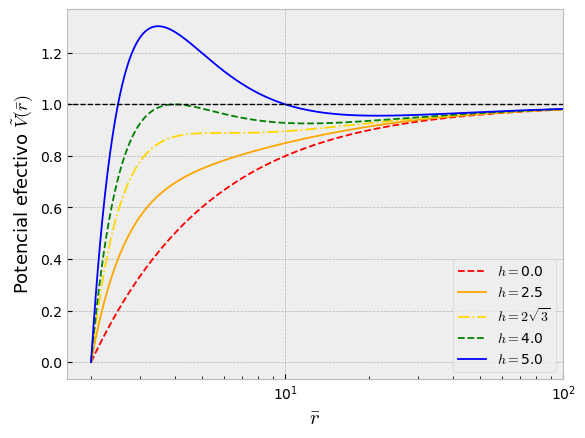

In [51]:
#Gráfica del potencial efectivo:
plt.plot(r,V(r,h[0]), color = colors[0], linewidth = 1.3, linestyle = '--', label = '$h = $'+str(h[0]))
plt.plot(r,V(r,h[1]), color = colors[1], linewidth = 1.3, label = '$h = $'+str(h[1]))
plt.plot(r,V(r,h[2]), color = colors[2], linewidth = 1.3, linestyle = '-.', label = '$h = 2\\sqrt{3}$')
plt.plot(r,V(r,h[3]), color = colors[3], linewidth = 1.3, linestyle = '--', label = '$h = $'+str(h[3]))
plt.plot(r,V(r,h[4]), color = colors[4], linewidth = 1.3, label = '$h = $'+str(h[4]))
plt.hlines(1.0,xmin= 0.0, xmax= r[-1], linewidth = 1, linestyles = '--', color = 'black')

plt.xscale('log')
plt.xlim(0,100)
plt.grid(True)
plt.legend(loc = 'best')

plt.xlabel('$\\bar{r}$',fontsize = 15)
plt.ylabel('Potencial efectivo $\\tilde{V}(\\bar{r})$',fontsize = 13)
plt.savefig('Potencial_Efectivo.pdf')

#### Solución numérica de la ecuación de las geodésicas tipo tiempo en la geometría de Schwarzchild